# Пингвини

## Лабораториска вежба 7

Разгледуваме множество податоци за пингвини од Антарктикот. Целта е да умееме да разликуваме три навидум исти видови на пингвини според податоците со кои располагаме. Податоците со кои располагаме се дадени во табелата подолу.

In [2]:
from IPython import display
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

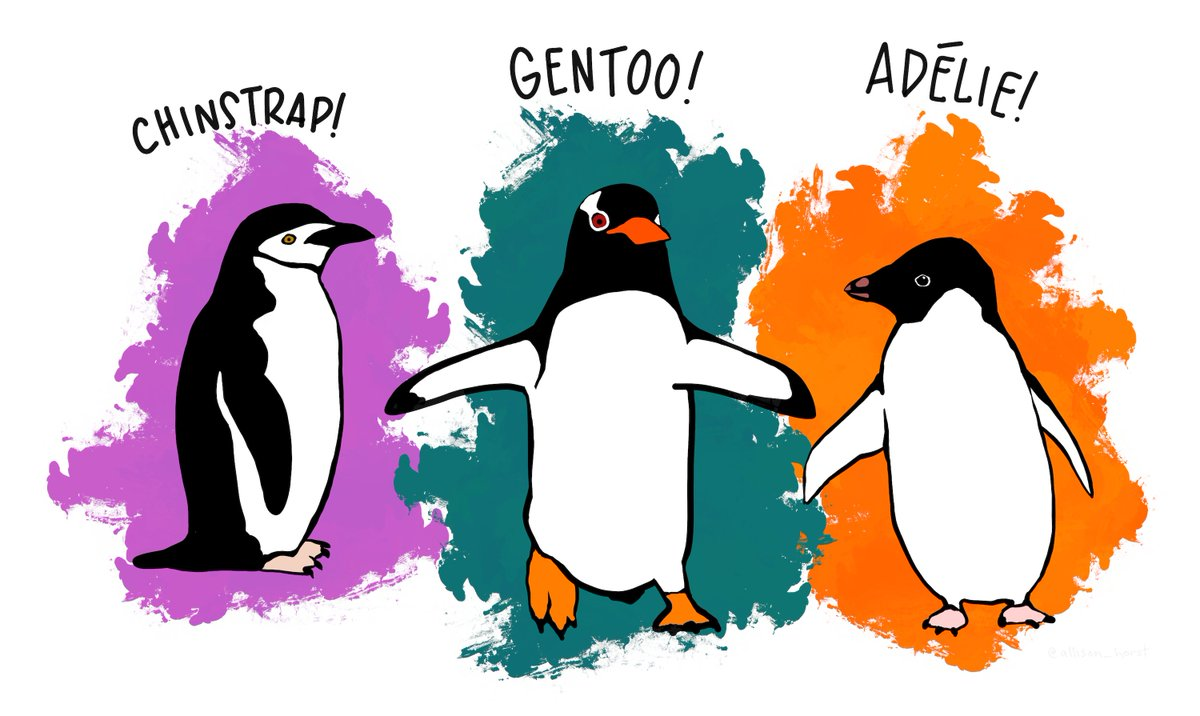

In [3]:
display.Image('images/penguins.jpg', width=450)

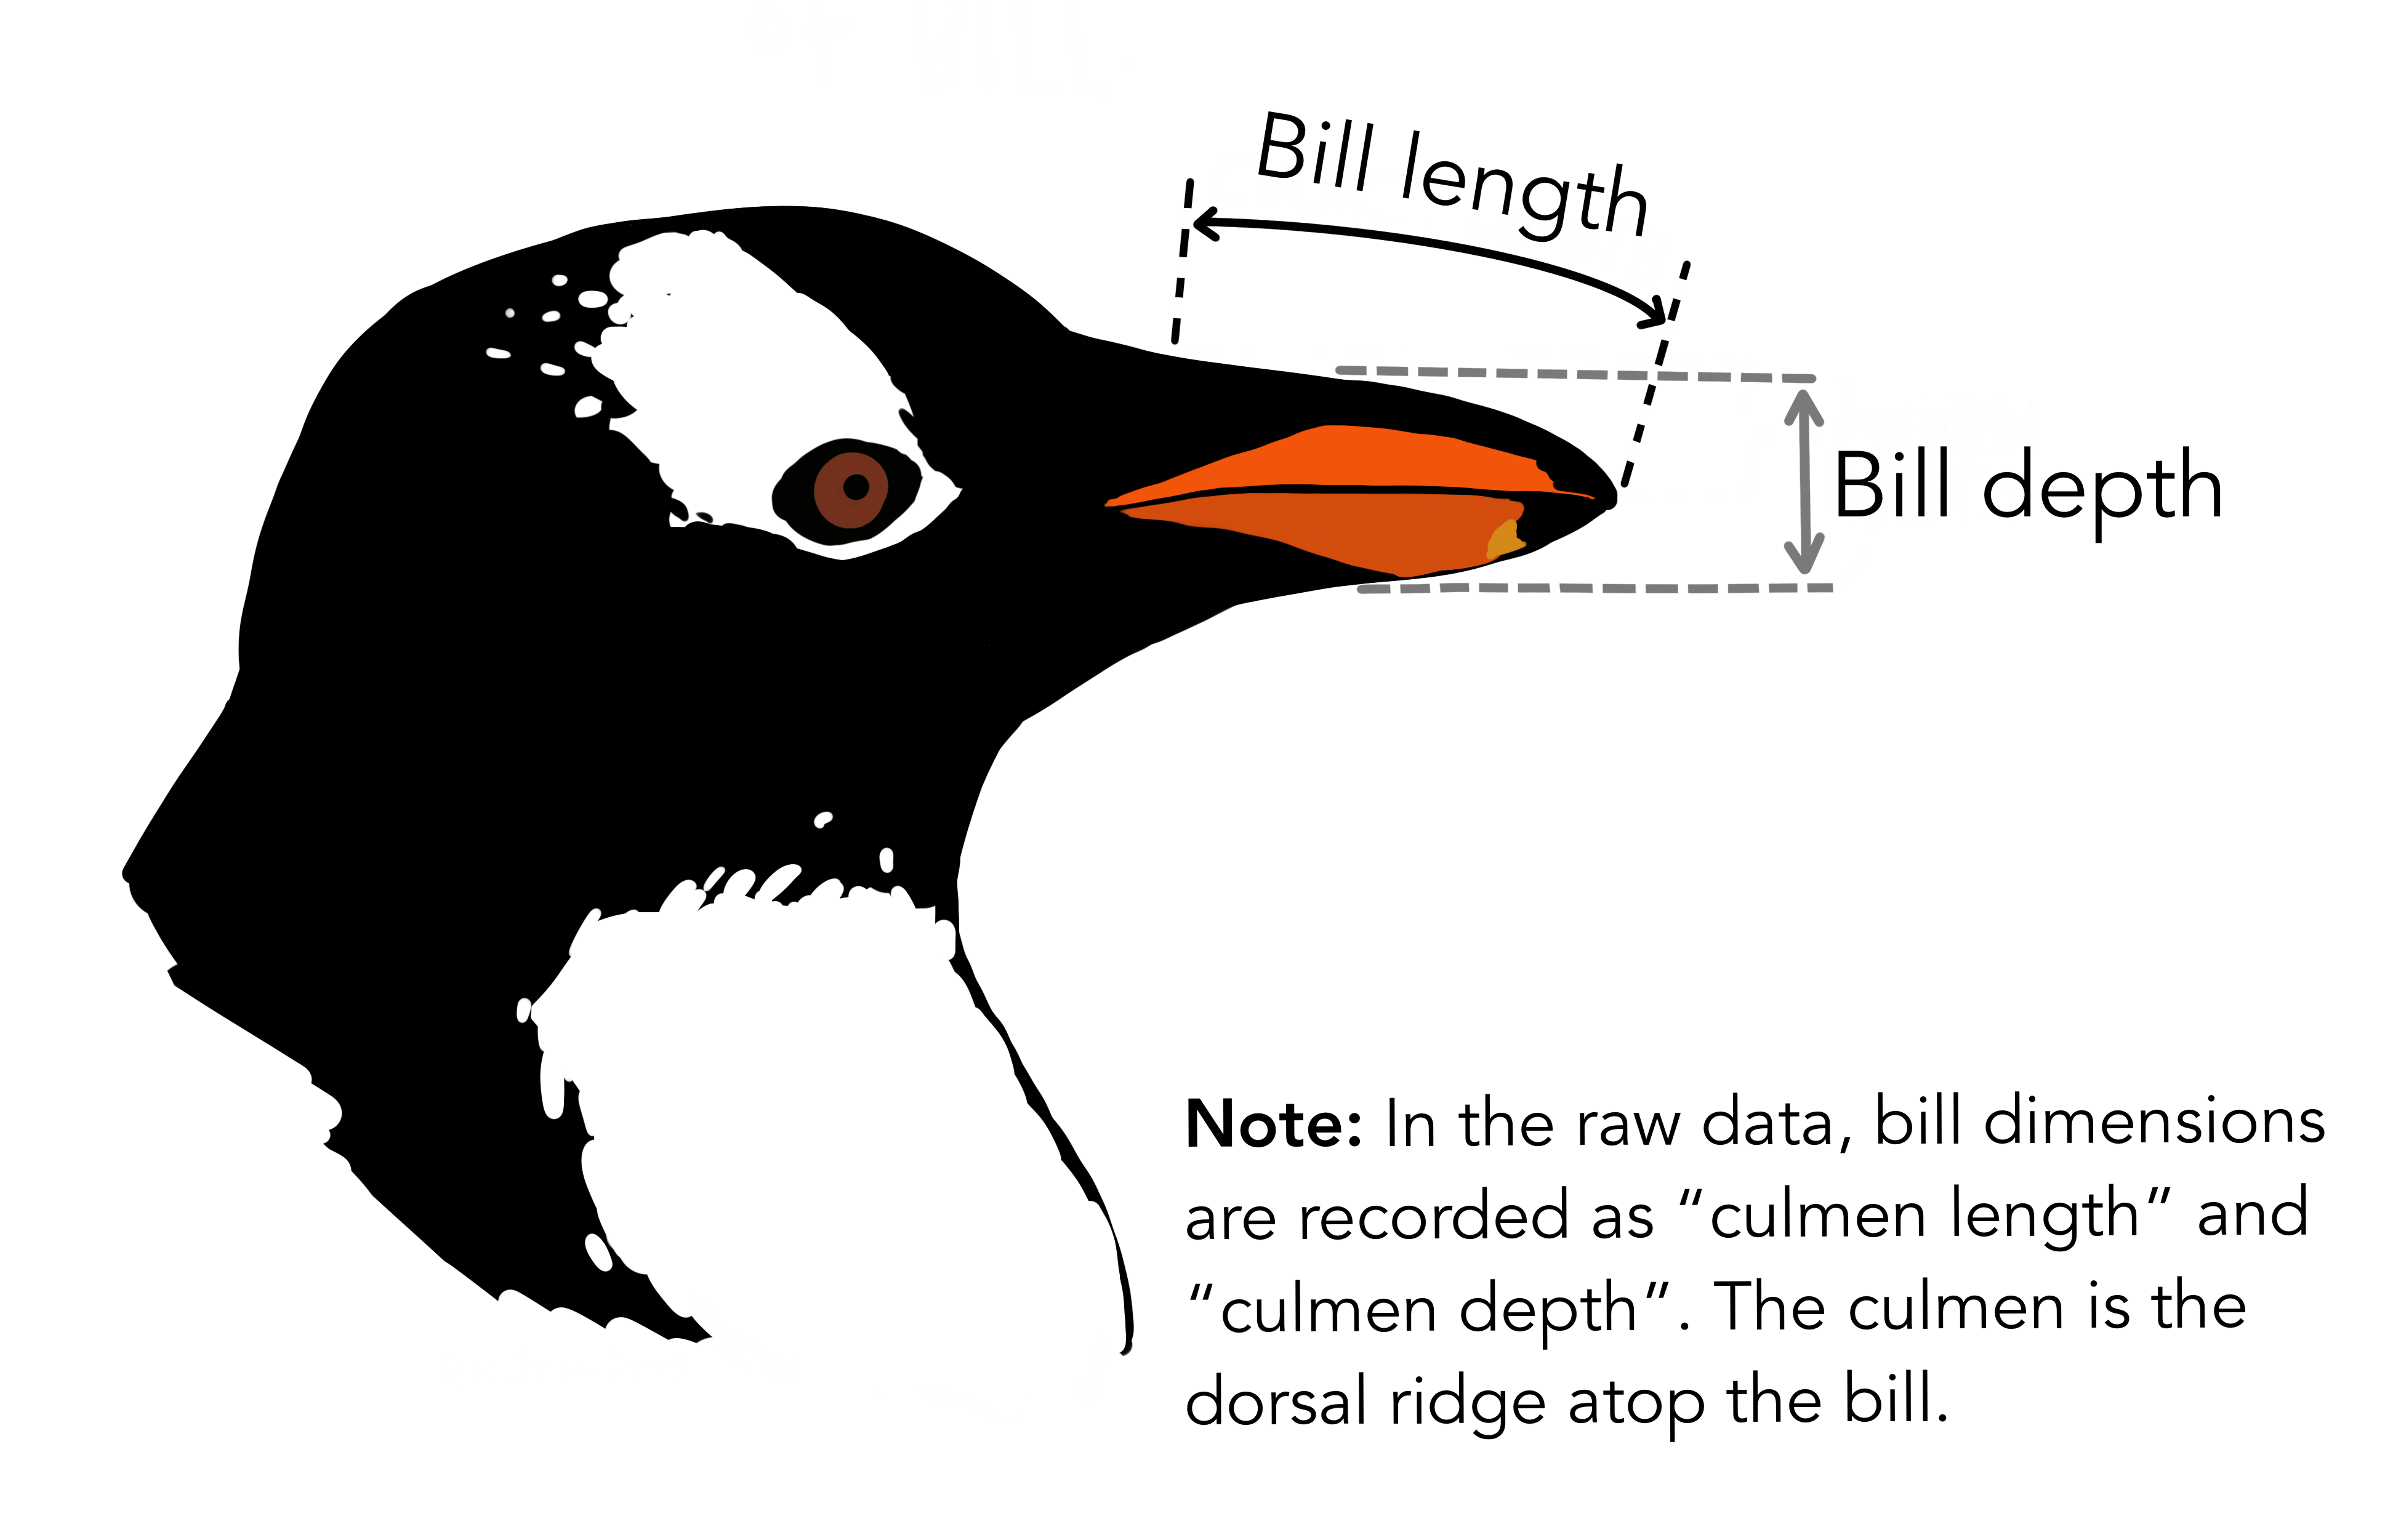

In [4]:
display.Image('images/culmen.png', width=450)

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('data/penguins.csv')
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7                181   
1    Adelie  Torgersen              39.5             17.4                186   
2    Adelie  Torgersen              40.3             18.0                195   
3    Adelie  Torgersen              36.7             19.3                193   
4    Adelie  Torgersen              39.3             20.6                190   
..      ...        ...               ...              ...                ...   
328  Gentoo     Biscoe              47.2             13.7                214   
329  Gentoo     Biscoe              46.8             14.3                215   
330  Gentoo     Biscoe              50.4             15.7                222   
331  Gentoo     Biscoe              45.2             14.8                212   
332  Gentoo     Biscoe              49.9             16.1                213   

     body_mass_g     sex  
0           3750    MALE  
1           3800  FEMALE  
2           3250  FEMALE  
3           3450  FEMALE  
4           3650    MALE  
..           ...     ...  
328         4925  FEMALE  
329         4850  FEMALE  
330         5750    MALE  
331         5200  FEMALE  
332         5400    MALE  

[333 rows x 7 columns]

Издвојте ја колоната `species` во нова променлива. Потоа поделете го податочното множество на два дела. Поголемиот дел нека е 80% и ќе служи за тренирање, а помалиот дел од 20% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [28]:
df_y = df.iloc[:, :1]
df_x = df.iloc[:, 1:]
df_x

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7                181   
1    Torgersen              39.5             17.4                186   
2    Torgersen              40.3             18.0                195   
3    Torgersen              36.7             19.3                193   
4    Torgersen              39.3             20.6                190   
..         ...               ...              ...                ...   
328     Biscoe              47.2             13.7                214   
329     Biscoe              46.8             14.3                215   
330     Biscoe              50.4             15.7                222   
331     Biscoe              45.2             14.8                212   
332     Biscoe              49.9             16.1                213   

     body_mass_g     sex  
0           3750    MALE  
1           3800  FEMALE  
2           3250  FEMALE  
3           3450  FEMALE  
4           3650    MALE  
..           ...     ...  
328         4925  FEMALE  
329         4850  FEMALE  
330         5750    MALE  
331         5200  FEMALE  
332         5400    MALE  

[333 rows x 6 columns]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=150)

Исцртајте ги на график пингвините така што на x и y оските ќе биде големината на клунот (culmen), а класата на пингвините ќе биде претставена со боја или симбол.

**Совет**: За помош, искористите го примерот `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

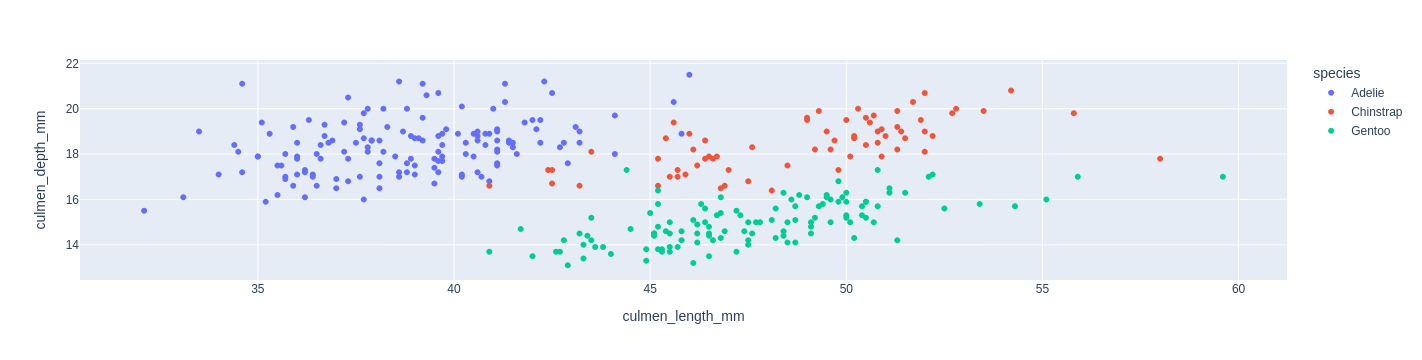

In [15]:
import plotly.express as px
fig = px.scatter(df, x="culmen_length_mm", y="culmen_depth_mm", color='species')
fig.show()


Користејќи ја библиотеката `sklearn`,  вчитајте невронска мрежа од типот `Multi-layer Perceptron`, претставено преку класата `MLPClassifier`, а потоа вметнете ги податоците за тренирање за да ја истренирате мрежата.

- [Пример за невронски мрежи од sklearn](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)
- [Документација за Multi-layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [16]:
from sklearn.neural_network import MLPClassifier

In [19]:
xe_train = pd.get_dummies(x_train)
xe_test = pd.get_dummies(x_test)

ye_train = pd.get_dummies(y_train)
ye_test = pd.get_dummies(y_test)
xe_train

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
172              50.5             18.4                200         3400   
219              46.5             13.5                210         4550   
9                34.6             21.1                198         4400   
86               34.0             17.1                185         3400   
78               37.3             17.8                191         3350   
..                ...              ...                ...          ...   
142              36.0             17.8                195         3450   
252              48.7             15.7                208         5350   
306              44.5             14.7                214         4850   
25               39.5             16.7                178         3250   
228              45.8             14.6                210         4200   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
172          False          True             False        True     False  
219           True         False             False        True     False  
9            False         False              True       False      True  
86           False          True             False        True     False  
78           False          True             False        True     False  
..             ...           ...               ...         ...       ...  
142          False          True             False        True     False  
252           True         False             False       False      True  
306           True         False             False        True     False  
25           False          True             False        True     False  
228           True         False             False        True     False  

[266 rows x 9 columns]

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(20,20,20))
clf.fit(xe_train, ye_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20))

Пресметајте ја прецизноста на мрежата за податоците кои мрежата ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на мрежата за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [21]:
ye_predict_test = clf.predict(xe_test)
ye_predict_train = clf.predict(xe_train)

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=ye_train, y_pred=ye_predict_train))
print('Accuracy Score on test data: ', accuracy_score(y_true=ye_test, y_pred=ye_predict_test))

Accuracy Score on train data:  0.35714285714285715
Accuracy Score on test data:  0.3582089552238806


Кои пингвини мрежата успева да ги распознава подобро, машките или женските?

Од кој вид е даден машки пингвин со признаци `culmen_length_mm = 72`, `culmen_depth_mm = 34`, `flipper_length_mm = 202`, `body_mass_g = 4450`, и е пронајден на островот Торгерсен?

In [37]:
data = { 
    'culmen_length_mm': [72],
    'culmen_depth_mm': [34],
    'flipper_length_mm': [202],
    'body_mass_g' : [4450],
    'island_Biscoe' : [False],
    'island_Dream' : [False],
    'island_Torgersen' : [True],
    'sex_FEMALE' : [False],
    'sex_MALE' : [True]
}

df_check_x = pd.DataFrame(data)
df_check_x 

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                72               34                202         4450   

   island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0          False         False              True       False      True

In [38]:
y_p = clf.predict(df_check_x)
y_p

array([[0, 0, 1]])